In [1]:
## Table of Content 
#1. Import Libraries
#2. Import dataset 
#3. Check missing values and dtype
#4. Descriptive Statistical Analysis & Data Visualization
#5. Slecet independent and dependent features and scale
#6. Build, train, and Evaluate Linear Regression and Decision Tree Regressor models to predict price 
#7. Predictions

##### Import libraries

In [2]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [3]:
# Load the data and store it in dataframe 
df = pd.read_csv('automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    0
diesel               0
gas                  0
dtype: int64

## Descriptive Statistical Analysis & Data Visualization

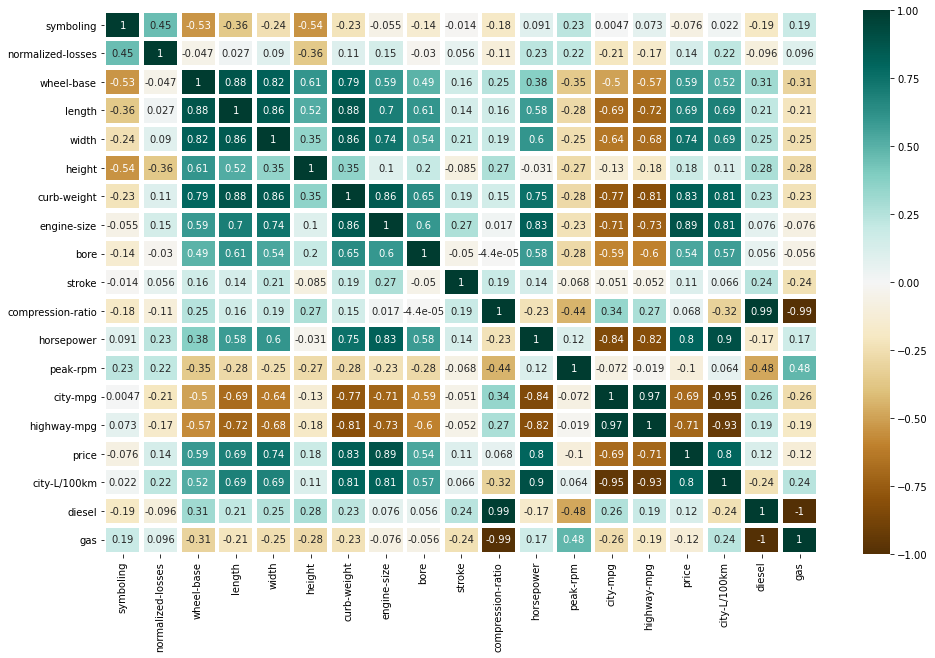

In [7]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot= True, cmap = 'BrBG', linewidths=3.5)

,engine-size,price
engine-size,1.000000,0.889265
price,0.889265,1.000000


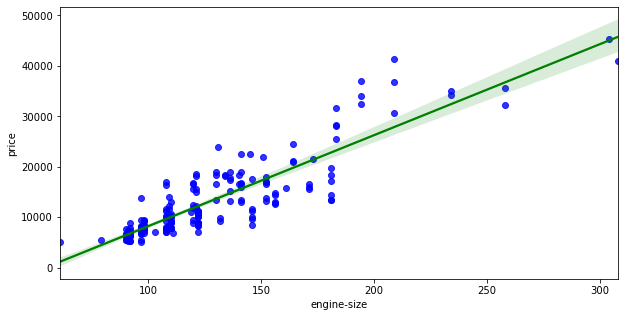

In [8]:
# Engine size as potential predictor variable of price
# correlation between Engine size and Price
plt.figure(figsize=(10,5))
sns.regplot(x="engine-size", y="price", data=df, scatter_kws={"color": "blue"}, line_kws={"color": "green"})
df[["engine-size", "price"]].corr()

Engine size and price are positively correlated with one another at 0.87.

,highway-mpg,price
highway-mpg,1.000000,-0.707466
price,-0.707466,1.000000


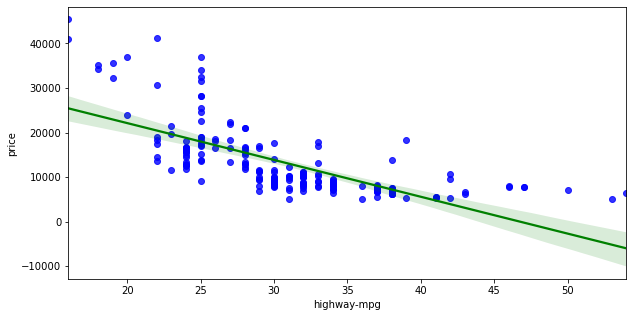

In [9]:
# Highway-mpg as a predictor variable of price 
# correlation between highway-mpg size and Price
plt.figure(figsize=(10,5))
sns.regplot(x="highway-mpg", y="price", data=df, scatter_kws={"color": "blue"}, line_kws={"color": "green"})
df[['highway-mpg', 'price']].corr()

Highway-mpg and price are negitvly correlated with one another at -0.704

,peak-rpm,price
peak-rpm,1.000000,-0.103535
price,-0.103535,1.000000


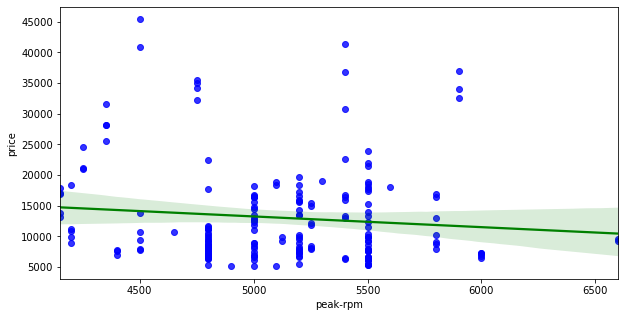

In [10]:
plt.figure(figsize=(10,5))
sns.regplot(x="peak-rpm", y="price", data=df, scatter_kws={"color": "blue"}, line_kws={"color": "green"})
df[['peak-rpm','price']].corr()

Weak correlation between peak-rpm and price. 

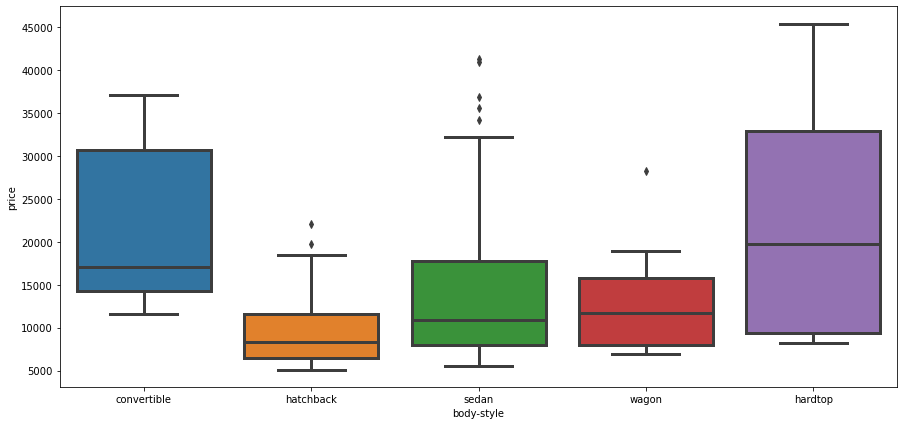

In [11]:
plt.figure(figsize=(15,7))
sns.boxplot(x="body-style", y="price", data=df, linewidth=3)

This shows that the difference in body-style isn't a good predictor of price.

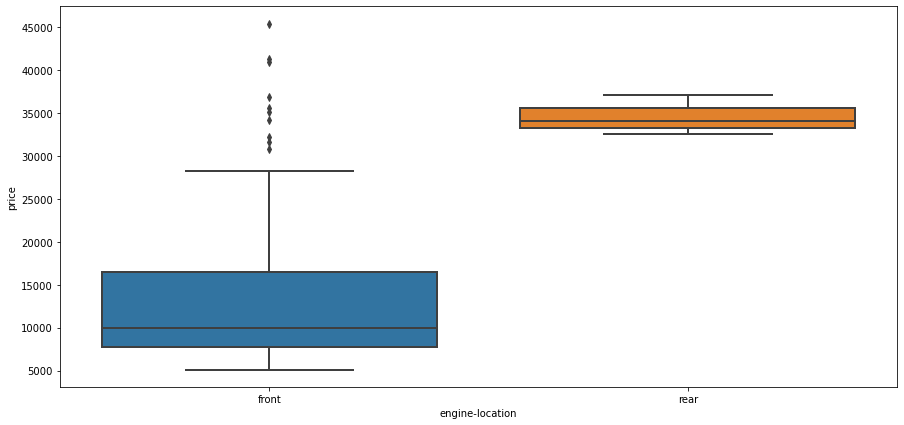

In [12]:
plt.figure(figsize=(15,7))
sns.boxplot(x="engine-location", y="price", data=df, linewidth=2)

Engine location seems to be a good predictor of price. 

Text(0.5, 1.0, 'Average Prices by Car Brands')

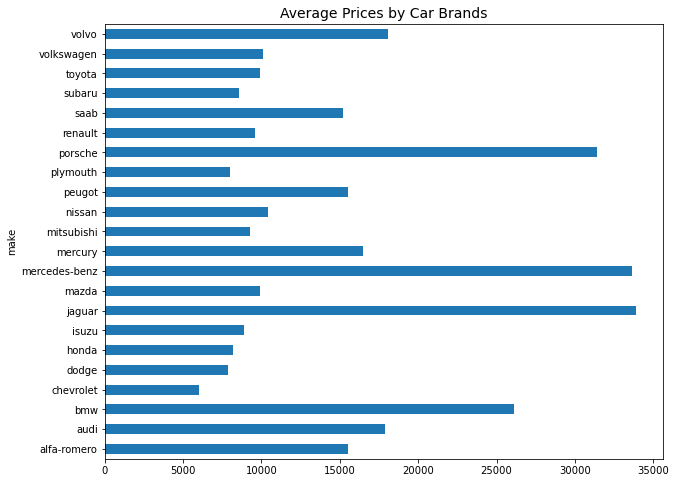

In [13]:
maker_price = round(df.groupby("make")["price"].mean())
maker_price.plot.barh(figsize=(10,8)).set_title("Average Prices by Car Brands", size=14)

In [15]:
# Correlation and P-value between horsepower and price
stats.pearsonr(df['horsepower'], df['price'])

(0.8020402807928606, 2.68640466763373e-45)

In [16]:
# what is on average the most valuable drive-wheel type?
df_groupDW = df[['drive-wheels','price']]
DWgroup = df_groupDW.groupby(['drive-wheels'],as_index=False).mean()
DWgroup.set_index('drive-wheels', inplace=True)
DWgroup

,price
drive-wheels,
4wd,10241.000000
fwd,9244.779661
rwd,19910.585714


Text(0.5, 1.0, 'Average Prices by drive-wheels')

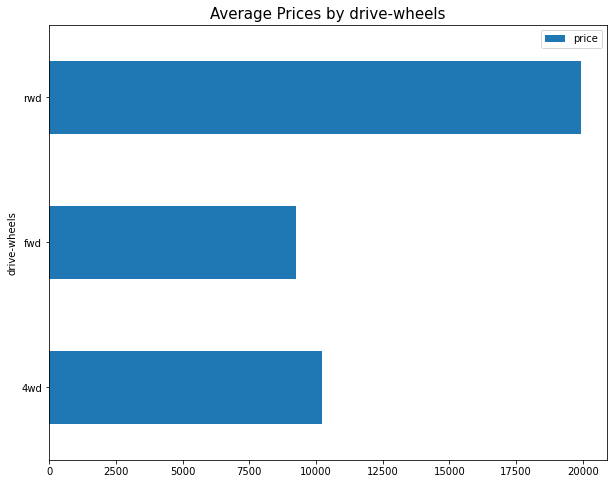

In [17]:
DWgroup.plot.barh(figsize=(10,8)).set_title("Average Prices by drive-wheels", size=15)

On average 4wd and fwd are close in price while rwd are nearly twice as expensive as both 4wd and fwd. 

In [18]:
# now group by drive-wheel and body-style and see what is the average price for all groups
df_groupDWBS = df[['drive-wheels','body-style', 'price']]
DWBSgroup = df_groupDWBS.groupby(['drive-wheels','body-style'],as_index=False).mean()

In [19]:
# now group by number of doors and see on average whats more valuable 2 doors or 4 doors
df_groupdoors = df[['num-of-doors', 'price']]
df_groupdoors.groupby(['num-of-doors'], as_index=False).mean()

,num-of-doors,price
0,four,13498.034783
1,two,12521.962963


On average 4 door cars are nearly $1000 more expensive. 

In [20]:
# feature select, scaling and target select
X = df[['horsepower','curb-weight', 'engine-size', 'highway-mpg']].values
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
y = df['price'].values

## Linear Regression Algorithm

In [21]:
# Scale independent features then create LinearRegression object 
# Afterward fit model with scaled features and target varible 
lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [22]:
# create predict object with test features
# print intercept and coefficient 
Yhat=lm.predict(X)
print(lm.intercept_)
print(lm.coef_)

13094.658163265307
[1890.46860945 2145.31491224 4135.32132689  752.63409411]


Text(0, 0.5, 'Proportion of Cars')

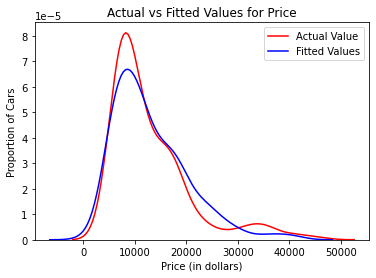

In [23]:
# graph predicted vs actual value
axs  =  sns.distplot(df['price'],hist=False,color='r',label="Actual Value")
sns.distplot(Yhat,hist=False, color="b", label="Fitted Values",ax=axs)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

In [24]:
#Evaluate model performance  
print('R^2:', lm.score(X,y))
print('MSE:', mean_squared_error(y, Yhat))

R^2: 0.8195813409131945
MSE: 11134473.857844774


## Decision Tree Regressor Algorithm

In [25]:
# split x and y to train and test subsets then create DecisionTreeRegressor object 
# Afterward fit model with training features and training target varible 
# create predict object with test features
train_x, test_x, train_y, test_y = train_test_split(X, y, random_state = 1, test_size=0.25)
spmodel = DecisionTreeRegressor()
spmodel.fit(train_x, train_y)
pretts = spmodel.predict(test_x)

Text(0, 0.5, 'Proportion of Cars')

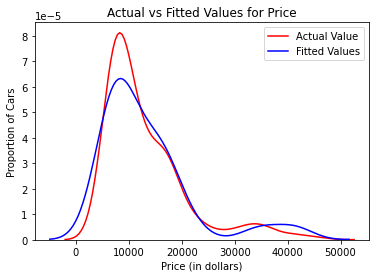

In [26]:
# graph predicted vs actual value
axs  =  sns.distplot(df['price'],hist=False,color='r',label="Actual Value")
sns.distplot(pretts,hist=False, color="b", label="Fitted Values",ax=axs)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')



In [27]:
#Evaluate model performance 
print('R^2 Accuracy Score for X and Y :', spmodel.score(X, y))
print('R^2 Accuracy Score for test_x and test_y:', spmodel.score(test_x, test_y))

R^2 Accuracy Score for X and Y : 0.9704015532967987
R^2 Accuracy Score for test_x and test_y: 0.8672231526306087


#### Predictions using Decision Tree Regressor model

In [28]:
# below values have been scaled already 
A = test_x[1:2]
B = X[7:8]
print(A)
print(B)

[[ 0.51580041  0.30927717  0.95665713 -0.43341197]]
[[ 0.20957173  0.7853884   0.23329886 -0.87972763]]


In [29]:
print('Predicted price for A using A inputs from test subset', 
      spmodel.predict([[0.51580041,  0.30927717,  0.95665713, -0.43341197]]))
print('Actual price for A from test subset', test_y[1:2])
print('Using test subsets estimations are off by', 
      spmodel.predict([[0.51580041,  0.30927717,  0.95665713, -0.43341197]]) - test_y[1:2])

Predicted price for A using A inputs from test subset [21105.]
Actual price for A from test subset [20970.]
Using test subsets estimations are off by [135.]


In [30]:
print('Price prediction for B using B inputs', spmodel.predict([[0.20957173,  0.7853884,   0.23329886, -0.87972763]]))
print('Actual price for B', y[7:8])

Price prediction for B using B inputs [18920.]
Actual price for B [18920.]
